<div style="background-color: Yellow; padding: 20px; text-align: center">
    <h2>ꕥ   Welcome   ꕥ</h2>
    <h2><b>Step 6 live presentation</b></h2>
    <h1><b>   Machine Learning Classification Models with Scikit-learn Library   </b></h1> 
    <h2><b>㋡ Maliheh Mahdavi Sefat ㋡</b></h2>   
    <p>#cs_internship</p>
    <p>#machine_learning</p>
    <p>February 2025</p>
</div>

Address to the scikit_learn documentation: 
[scikit-learn Machine Learning in Python](https://scikit-learn.org/stable/)

In [1]:
# all the library imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from plotplates import plot_decision_regions

<div style="color:white; background-color: maroon; padding: 15px;">
  <h2>1- Load the Dataset:</h2>
  <p><b>create the dataset using scikit_learn, numpy and pandas</b></p>
</div>

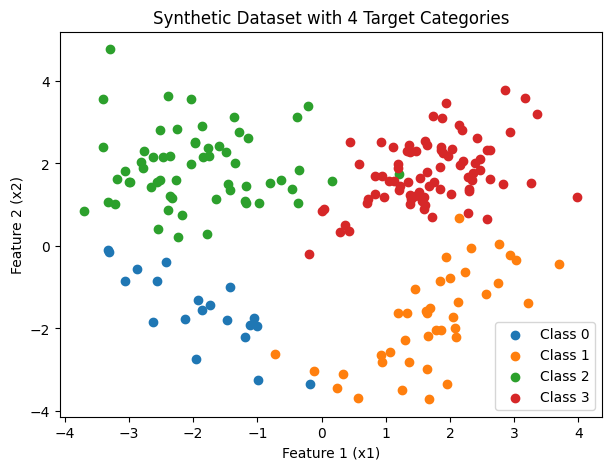

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=4, class_sep=1.8, weights= [.1,.2,.3,.4])

# Plot the generated dataset
plt.figure(figsize=(7, 5))
for i in range(4):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}')
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.legend()
plt.title('Synthetic Dataset with 4 Target Categories');

In [3]:
import pandas as pd

# Create its DataFrame
points = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
points['Target'] = y

# Display its DataFrame
points.head(4)

,Feature 1,Feature 2,Target
0,-0.636835,1.589625,2
1,-0.810324,1.537187,2
2,2.751332,-0.900600,1
3,2.930081,2.758229,3


<div style="color:white; background-color: maroon; padding: 15px;">
  <h2>2- Explore the Data:</h2>
  <p><b>explore the dataset to understand its structure and features</b></p>
</div>

In [4]:
# display column data types, memory usage and information
points.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Target     200 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


In [5]:
# how many of each class do we have?
how_many = points.groupby("Target").size()
how_many

Target
0    20
1    40
2    60
3    80
dtype: int64

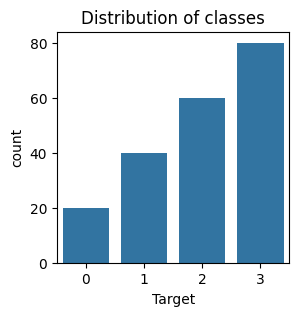

In [6]:
import seaborn as sns

# how are the classes distributed?
plt.figure(figsize=(3,3))
sns.countplot(x=points["Target"])
plt.title("Distribution of classes");

<div style="color:white; background-color: maroon; padding: 15px;">
  <h2>3- Preprocess the Data:</h2>
  <p><b>clean and preprocess the data if necessary</b></p>
</div>

In [7]:
# are there any duplicate rows?
points.duplicated().sum()

np.int64(0)

In [8]:
# summary statistics for numerical features
points.describe().round(3)

,Feature 1,Feature 2,Target
count,200.000,200.000,200.000
mean,0.249,0.770,2.000
std,1.988,1.861,1.003
min,-3.696,-3.717,0.000
25%,-1.663,-0.472,1.000
50%,0.956,1.327,2.000
75%,1.854,2.117,3.000
max,3.986,4.771,3.000


<div style="color:white; background-color: teal; padding: 15px;">
  <h3>Feature Selection and Data Splitting</h3>
</div>

<div style="background-color: gold; padding: 15px;">
  <h3>Choose a subset of the data</h3>
    <p>Pairplot</p>
    <li>histograms on the diagonal show distribution of each variable</li>
    <li>Any potential linear relationships between variables.</li> 
    <li>How different classes are distributed across variable pairs.</li> 
    <li>Possible outliers or unusual data points.</li>
</div>

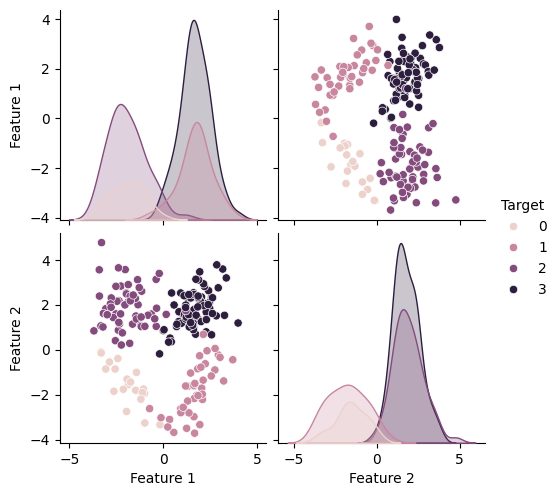

In [9]:
# visualize feature relationships across different car class
sns.pairplot(points, hue= 'Target');
# sns.pairplot(points);

<div style="background-color: gold; padding: 15px;">
    <h3>Split the examples into train and test portions</h3>
  <p><b>Collect labeled training examples</b></p>
</div>

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

<div style="background-color: pink; padding: 15px;">
  <p>Stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.</p>
</div>

In [11]:
# check the porportion of test and train data
print('Labels counts in y:      ', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test: ', np.bincount(y_test))

Labels counts in y:       [20 40 60 80]
Labels counts in y_train: [14 28 42 56]
Labels counts in y_test:  [ 6 12 18 24]


<div style="background-color: gold; padding: 15px;">
  <p><b>Feature Scaling: numerical features better be standardized or normalized</b></p>
</div>

In [12]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Combines two steps. Fit computes the mean and standard deviation for each feature
X_test_scaled = scaler.transform(X_test)

<div style="color:white; background-color: maroon; padding: 15px;">
  <h2>4- Build Classification Models:</h2>
  <p><b>build and evaluate classification models using machine learning algorithms</b></p>
</div>

<div style="background-color: greenyellow; padding: 15px;">
  <h3>1) Perceptron</h3>
    <b>Training a perceptron via scikit-learn</b>
</div>

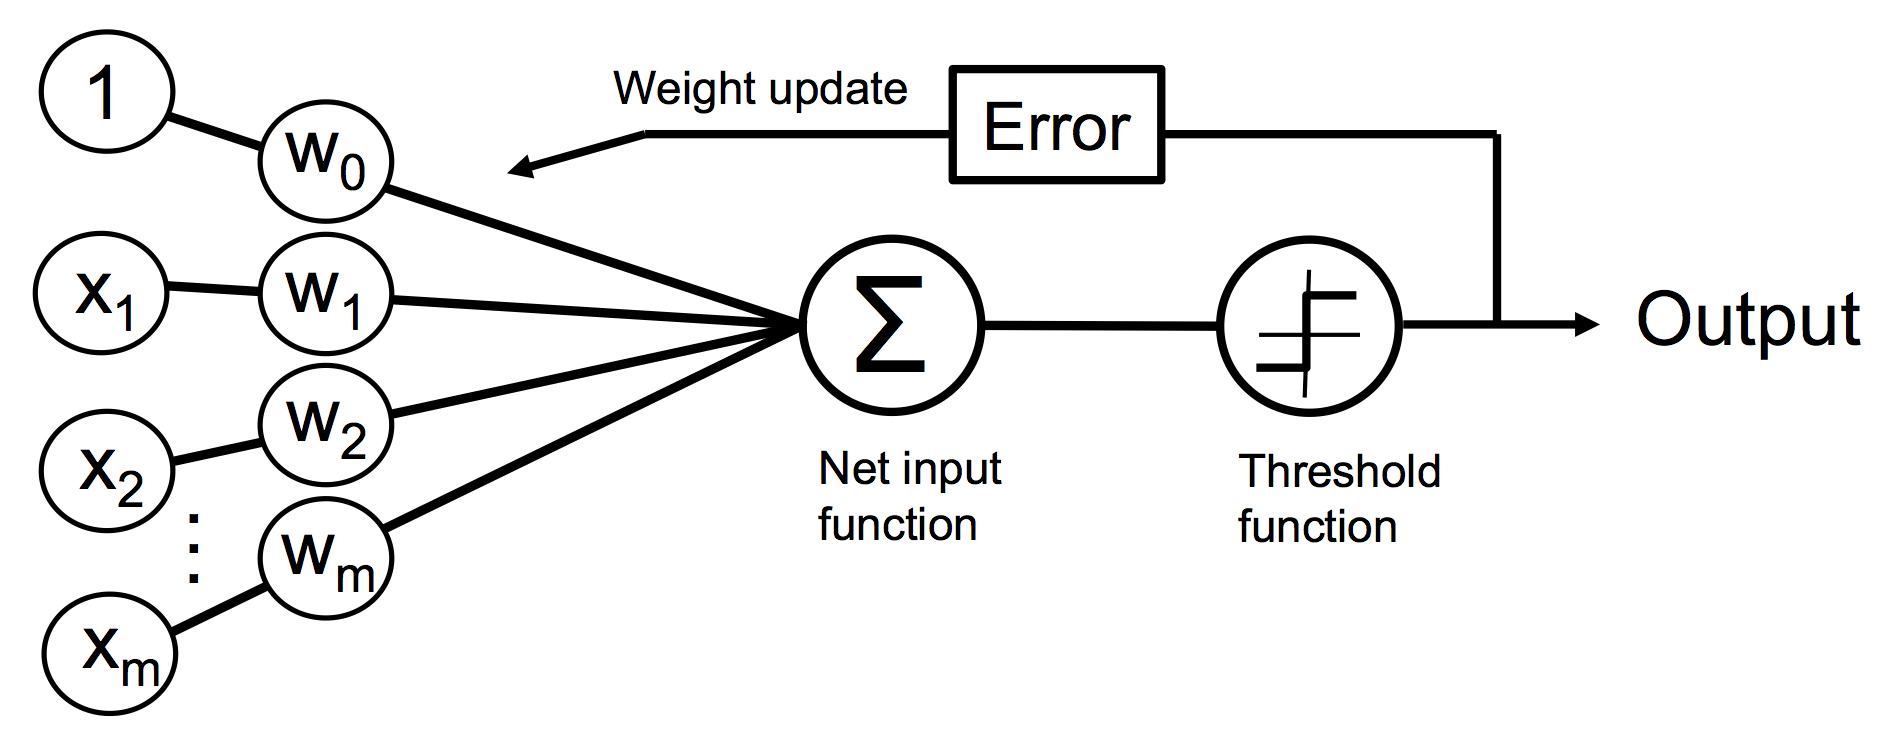

<p style="background-color: khaki; padding: 15px;">A type of artificial neural network unit that uses input data to make simple binary decisions by applying learned weights and a bias through an activation function.</p>

In [13]:
from sklearn.linear_model import Perceptron

# choosing classifier
ppn = Perceptron(eta0 = 0.1, random_state=1)  # too large learning rate, the algorithm will overshoot the global cost minimum.

# training the model
ppn.fit(X_train_scaled, y_train)

Perceptron(eta0=0.1, random_state=1)

In [14]:
# make predictions via the predict method
y_pred = ppn.predict(X_test_scaled)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

# calculate the classification accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Misclassified examples: 7
Accuracy: 0.883


In [15]:
# score method, combines the predict call with accuracy_score
print('Accuracy: %.3f' % ppn.score(X_test_scaled, y_test)) 

Accuracy: 0.883


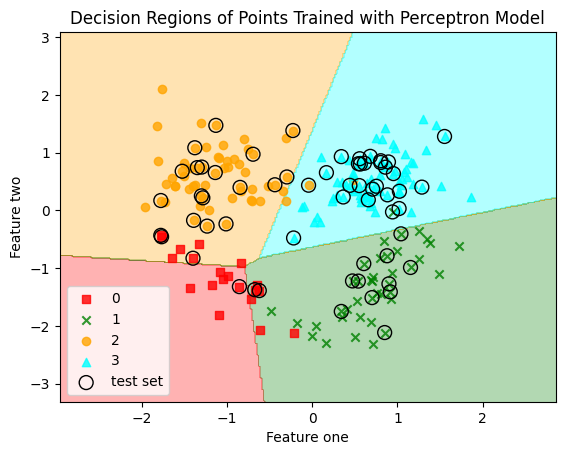

In [16]:
from plotplates import plot_decision_regions

# combine the train and test parts of the data
X_combined_scaled = np.vstack((X_train_scaled, X_test_scaled))
y_combined = np.hstack((y_train, y_test))

# plot the decision regions, train and test examples
plot_decision_regions(X=X_combined_scaled, y=y_combined, classifier=ppn, test_idx=range(140, 200))
plt.title('Decision Regions of Points Trained with Perceptron Model')
plt.xlabel('Feature one')
plt.ylabel('Feature two')
plt.legend(loc='lower left');

<div style="background-color: greenyellow; padding: 15px;">
  <h3>2) Logistic Regression</h3>
    <b>Modeling class probabilities via logistic regression</b>
</div>

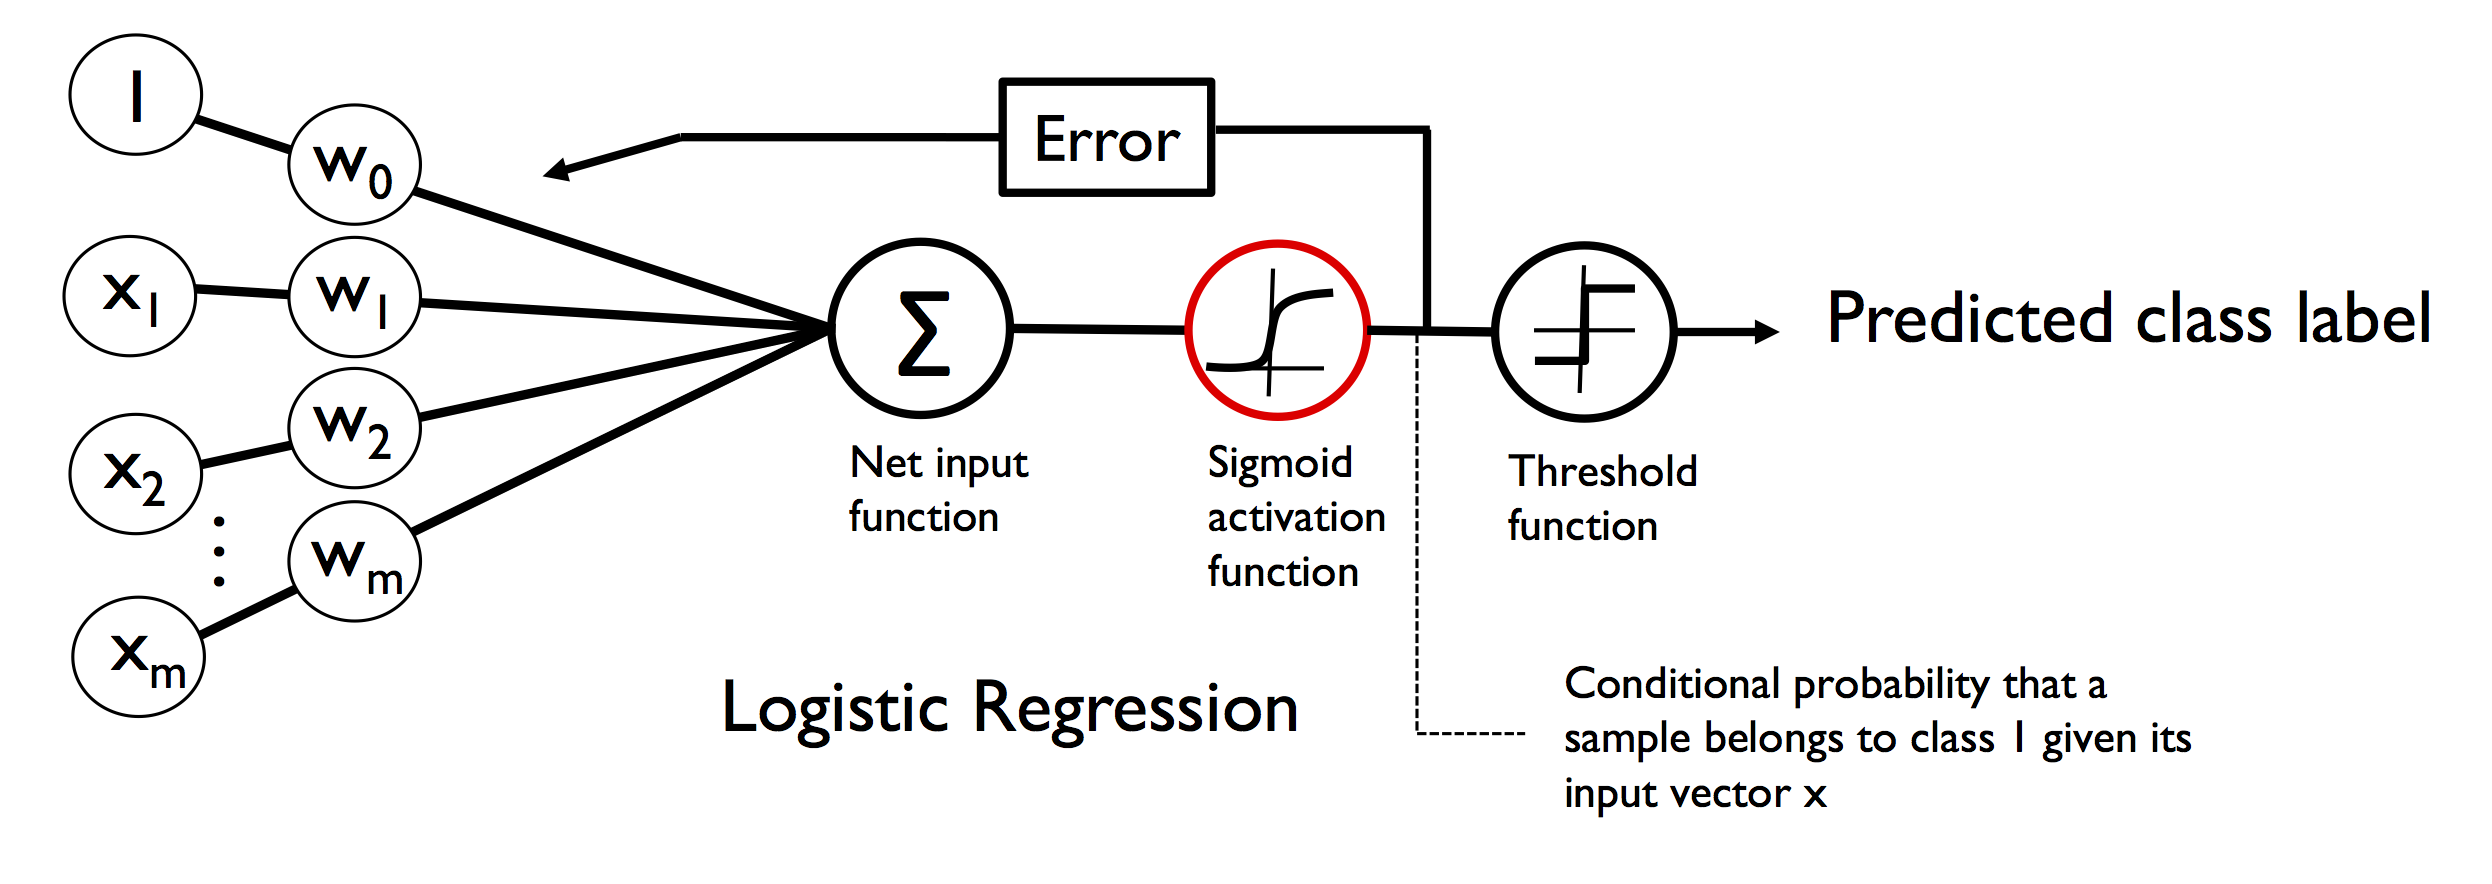

<div style="background-color: khaki; padding: 15px;"><li>Logistic regression is based on <b>conditional probability</b> that a given input belongs to a particular class. It is computed using the <b>sigmoid function</b>.</li>
<li><b>The cost function</b> calculates the error between the predicted probabilities and the actual lables.</li>
<li><b>Gradient descent</b> as optimization algorithm calculates the gradient (or slope) of the cost function with respect to each weight and updates the weights to minimize the cost.</li></div>

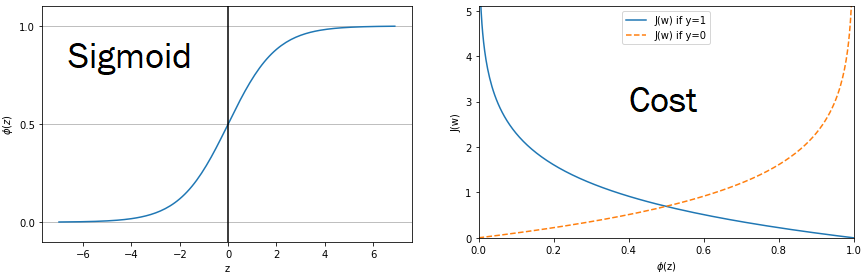

Accuracy of LR: 0.967


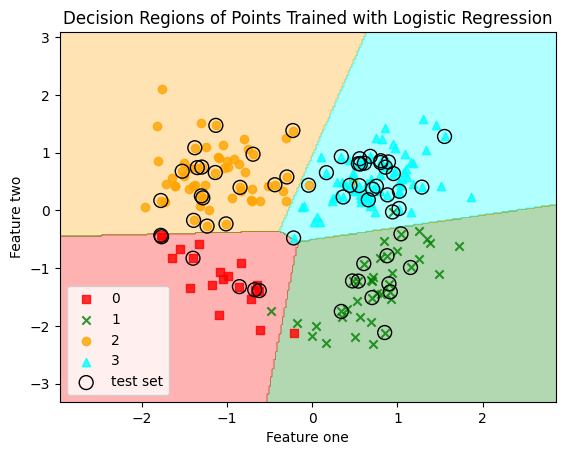

In [17]:
# logistic regression model from sciekit learn library
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=10.0, random_state=1, solver='lbfgs')  # solver: optimization function  
                                                                 # smaller C: stronger regularization, looser fit
# train the model
lr.fit(X_train_scaled, y_train)

# check the accuracy rate from the model
print('Accuracy of LR: %.3f' % lr.score(X_test_scaled, y_test))

# plot the decision regions, train and test examples
plot_decision_regions(X_combined_scaled, y_combined, classifier=lr, test_idx=range(140, 200))
plt.title('Decision Regions of Points Trained with Logistic Regression')
plt.xlabel('Feature one')
plt.ylabel('Feature two')
plt.legend(loc='lower left');

<div style="background-color: khaki; padding: 15px;"><h3>Regularisation</h3>
    <li><b>Regularization</b> is a technique used to prevent overfitting by adding a penalty for larger weights to the model's cost function.</li>
    <li><b>Overfitting</b> means that the model captures the patterns in the training data well but fails to generalize well to unseen data.</li>
    <li><b>Variance</b> measures the consistency (or variability) of the model prediction.</li>
    <li><b>Bias</b> measures how far off the predictions are from the correct values in general.</li>
    <li><b>high variance</b> is proportional to overfitting and <b>high bias</b> is proportional to underfitting.</li>
    <li><b>Smaller values of C </b> correspond to stronger regularization, which can help prevent overfitting by <b>penalizing large coefficients.</b></li>
</div>

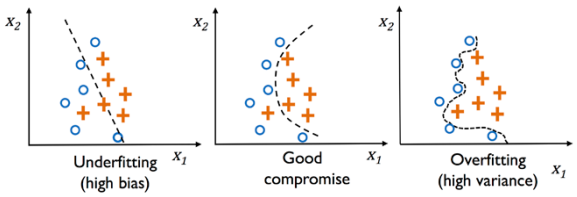

<div style="background-color: greenyellow; padding: 15px;">
  <h3>3) Support vector machines</h3>
    <b>Maximum margin classification with SVM</b>
</div>

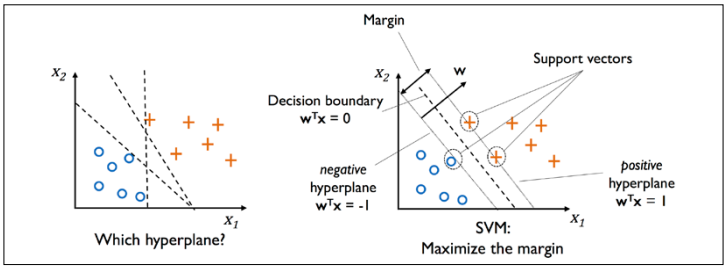

Accuracy of SMV: 0.967


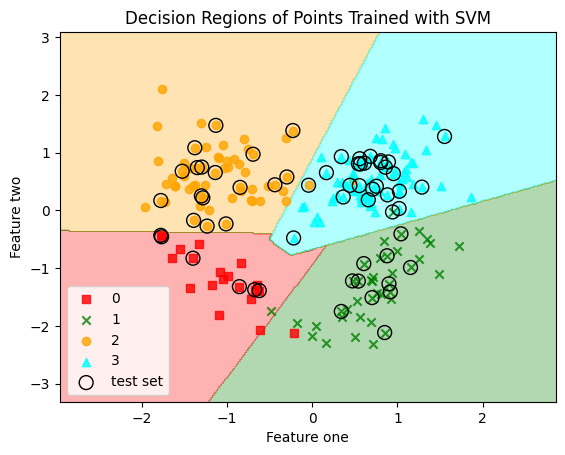

In [18]:
from sklearn.svm import SVC

svm = SVC(kernel='linear',
          C=1.0,             # Smaller C (stronger regularization): Wider margin but misclassifies some training points.
          random_state=1)    # larger C (weaker regularization): tries to classify all training examples correctly, narrower margin.

# train the model                                                 
svm.fit(X_train_scaled, y_train)

# check the accuracy rate from the model
print('Accuracy of SMV: %.3f' % svm.score(X_test_scaled, y_test))

# plot the decision regions, train and test examples
plot_decision_regions(X_combined_scaled, y_combined, classifier=svm, test_idx=range(140, 200))
plt.title('Decision Regions of Points Trained with SVM')
plt.xlabel('Feature one')
plt.ylabel('Feature two')
plt.legend(loc='lower left');

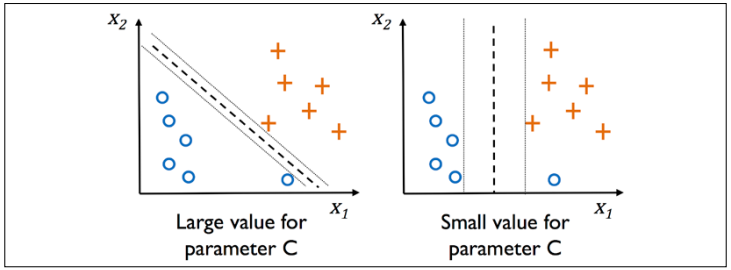

<div style="background-color: khaki; padding: 15px;">
  <h3>Kernels for linearly inseparable data</h3>
    <p>For nonlinear datasets, we use the kernel trick. This involves transforming the data into a higher-dimensional space where it becomes linearly separable. Common kernels for this include the Radial Basis Function (RBF) and polynomial kernels.</p>
    <li><b>Kernel:</b> A mathematical function that implicitly maps data to a higher-dimensional space. Decides the shape of the decision boundary.</li>
    <li><b>Gamma:</b> Controls how far the influence of each data point reaches.</li>
<li><b>C:</b> Balances between fitting the training data perfectly and having a wider margin.</li>

</div>

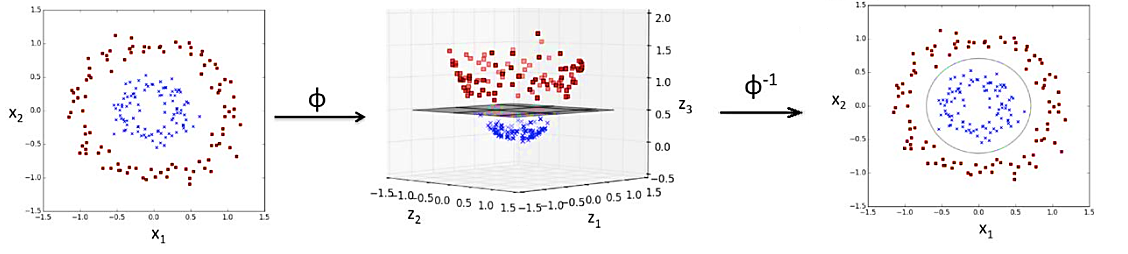

Accuracy of kernelised SMV: 0.967


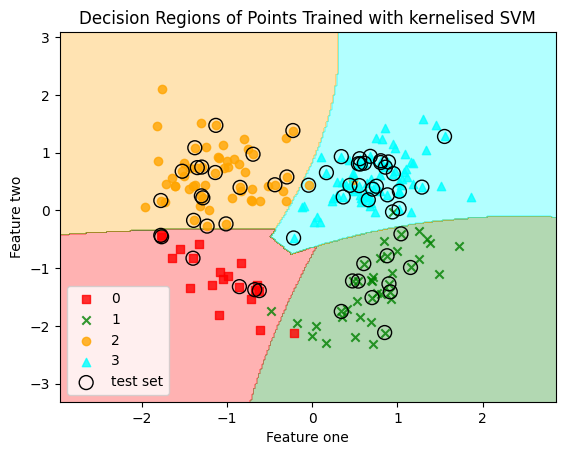

In [19]:
# try other kernels
svm_kerneled = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)    # higher gamma: tighter fit

# train the model
svm_kerneled.fit(X_train_scaled, y_train)

# check the accuracy rate from the model
print('Accuracy of kernelised SMV: %.3f' % svm_kerneled.score(X_test_scaled, y_test))

# plot the decision regions, train and test examples
plot_decision_regions(X_combined_scaled, y_combined, classifier=svm_kerneled, test_idx=range(140, 200))
plt.title('Decision Regions of Points Trained with kernelised SVM')
plt.xlabel('Feature one')
plt.ylabel('Feature two')
plt.legend(loc='lower left');

<div style="background-color: violet; padding: 15px;">
  <h3>Creating a linearly inseparable dataset and working with kernels</h3>
</div>

Accuracy of LR on MakeMoons: 0.833


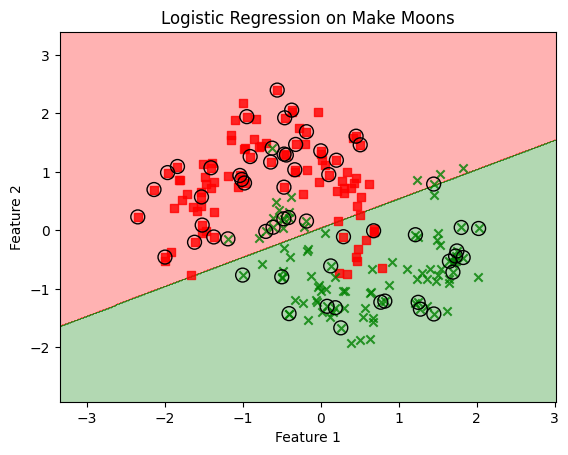

In [20]:
from sklearn.datasets import make_moons

# Generate the Make Moons dataset
X2, y2 = make_moons(n_samples=200, noise=0.2, random_state=42)

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

# Train a Logistic Regression classifier
clf = LogisticRegression()
clf.fit(X2_train_scaled, y2_train)

# Combine training and testing data for plotting
X2_combined_scaled = np.vstack((X2_train_scaled, X2_test_scaled))
y2_combined = np.hstack((y2_train, y2_test))

# check the accuracy rate from the model
print('Accuracy of LR on MakeMoons: %.3f' % clf.score(X2_test_scaled, y2_test))

# Plot decision regions
plot_decision_regions(X2_combined_scaled, y2_combined, classifier=clf, test_idx=range(140, 200))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression on Make Moons');

Accuracy of kernelised SMV on make moons: 0.983


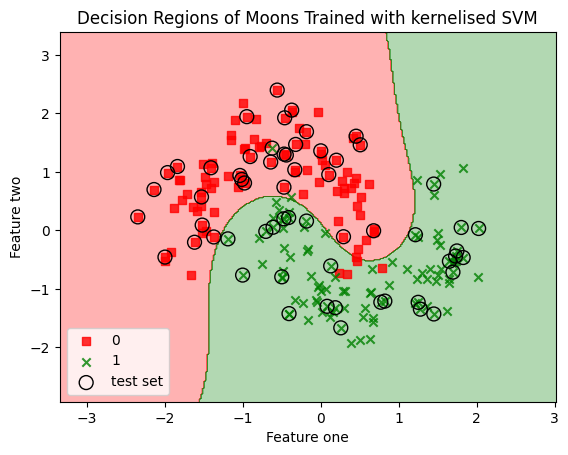

In [21]:
# try SVM with kernels
svm_kerneled = SVC(kernel='rbf', random_state=1, gamma=0.25, C=10.0)  # higher gamma: tighter fit
                                                                      # kernels:'rbf' | 'poly', degree=3 | 'sigmoid' | 'precomputed'
# train the model
svm_kerneled.fit(X2_train_scaled, y2_train)

# check the accuracy rate from the model
print('Accuracy of kernelised SMV on make moons: %.3f' % svm_kerneled.score(X2_test_scaled, y2_test))

# plot the decision regions, train and test examples
plot_decision_regions(X2_combined_scaled, y2_combined, classifier=svm_kerneled, test_idx=range(140, 200))
plt.title('Decision Regions of Moons Trained with kernelised SVM')
plt.xlabel('Feature one')
plt.ylabel('Feature two')
plt.legend(loc='lower left');

<div style="background-color: greenyellow; padding: 15px;">
  <h3>4) Decision Tree</h3>
    <b>breaking down the data by making a decision based on asking a series of questions</b>
</div>

<div style="background-color: khaki; padding: 15px;">
    <ol>
        <li> Start at the tree root (the whole dataset).</li>
    <li> Split the data on the feature that result in the largest Information Gain (IG).</li>
    <li> Prune the tree by setting a limit for the maximal depth of the tree.</li>
    </ol>
    <b>IG is the difference between the impurity of the parent node and the sum of the child node impurities.</b>
</div>

Accuracy of decision tree: 0.817


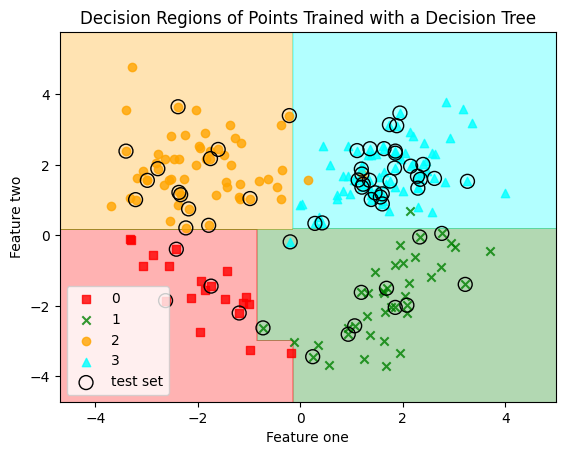

In [22]:
# a decision tree with a maximum depth of 4, using Gini impurity
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini',     # Impurity measures or spliting criteria:
                                    max_depth=4,          # Gini impurity, entropy, classification error
                                    random_state=1) 
# train the tree                                          # the tree can handle features of different scales and ranges naturally,
tree_model.fit(X_train, y_train)                          # scaling does not affect the decision tree's performance

# check the accuracy rate from the model
print('Accuracy of decision tree: %.3f' % tree_model.score(X_test_scaled, y_test))

# plot the decision regions, train and test examples
plot_decision_regions(X, y,                          
                      classifier=tree_model,          
                      test_idx=range(140, 200)) 
plt.title('Decision Regions of Points Trained with a Decision Tree')         
plt.xlabel('Feature one')                                                    
plt.ylabel('Feature two')
plt.legend(loc='lower left');

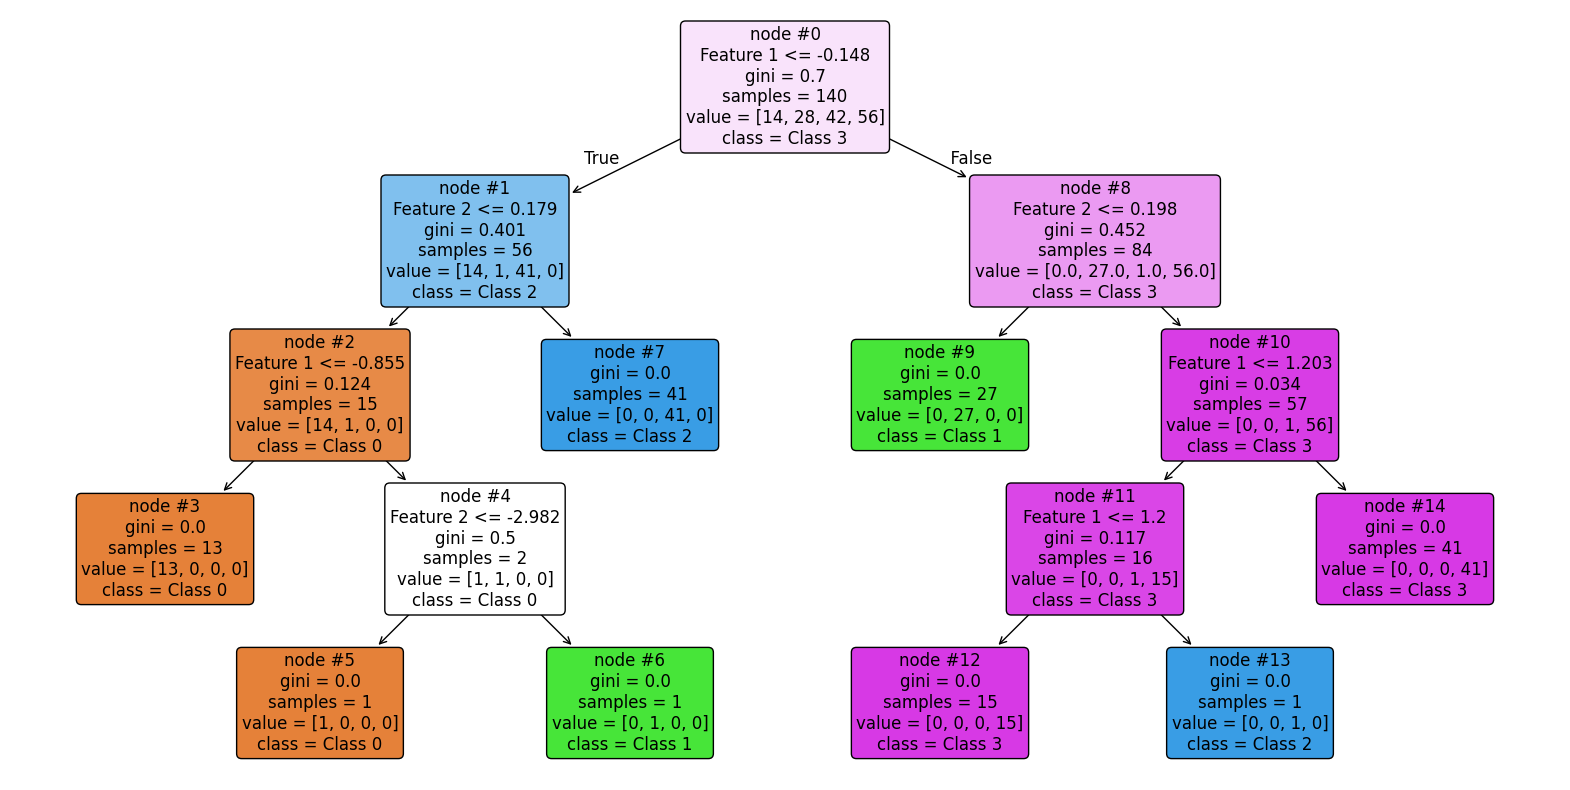

In [23]:
# visualize the decision tree model after training
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree_model, 
          feature_names=['Feature 1', 'Feature 2'], 
          class_names=[f'Class {i}' for i in range(4)], 
          filled=True, 
          rounded=True, 
          impurity=True, 
          node_ids=True, 
          proportion=False, 
          fontsize=12);

<div style=" background-color: greenyellow; padding: 15px;">
  <h3>5) Random Forest Classifier</h3>
    <b>Combining multiple decision trees for better generalization and less overfitting.</b>
</div>

<div style="background-color: khaki; padding: 15px;">
    <ol>
        <li> Draw a random bootstrap sample of size n.</li>
        <li> Grow a decision tree from the bootstrap sample. At each node:</li>
        <ol>
            <li> Randomly select d features without replacement</li>
            <li>Split the node using the feature that provides the best split(IG)</li>
        </ol>
        <li>Repeat the steps 1-2 k times</li>
        <li>Aggregate the prediction by each tree to assign the class label by majority
vote. </li>
        </ol>
</div>

Accuracy of RF: 0.883


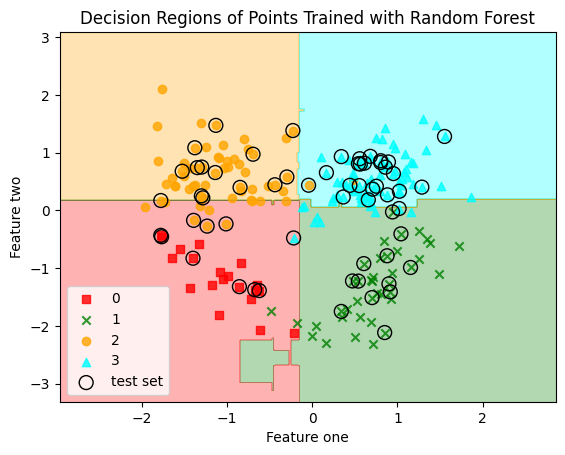

In [24]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', 
                                n_estimators=25,   # n_estimators: number of trees in the forest
                                random_state=1, 
                                n_jobs=2)          # n_jobs: number of CPU cores used for parallel processing
                                           
# train the model
forest.fit(X_train, y_train)

# check the accuracy rate from the model
print('Accuracy of RF: %.3f' % forest.score(X_test_scaled, y_test))

# plot the decision regions, train and test examples
plot_decision_regions(X_combined_scaled, y_combined, classifier=forest, test_idx=range(140, 200))
plt.title('Decision Regions of Points Trained with Random Forest')
plt.xlabel('Feature one')
plt.ylabel('Feature two')
plt.legend(loc='lower left');

<div style="background-color: greenyellow; padding: 15px;">
  <h3>6) K-nearest neighbors</h3>
    <b>a lazy learning algorithm</b>
</div>

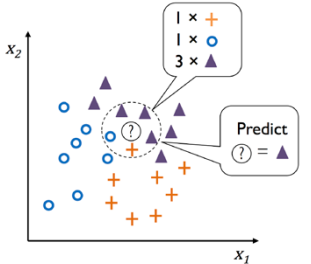

<div style="background-color: khaki; padding: 15px;">
    <ul>
        <li> nonparametric model ⟹ instance-based learning</li>
        <li> it doesn't learn a discriminative function from the training data but <b>memorizes</b> the training dataset instead</li>
        <li>Computational complexity for classifying new examples grows linearly</li>
        <li>Storage space can become a challenge </li>
    </ul>
    <ol> 
        <li> Choose the number of k and a distance metric.</li>
        <li>Find the k-nearest neighbors of the data record that we want to classify.</li>
        <li>Assign the class label by majority or average vote.</li>
    </ol>
</div>

Accuracy of KNN: 0.967


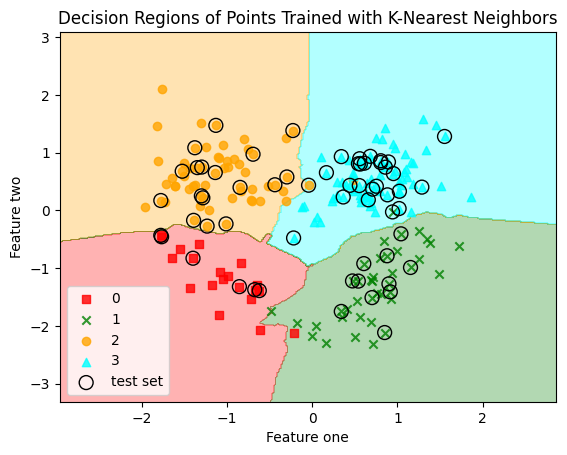

In [25]:
from sklearn.neighbors import KNeighborsClassifier
# choose classifier
knn = KNeighborsClassifier(n_neighbors=3,p= 2, metric='minkowski')  # 'euclidean' 'manhattan' ...distance
                                                                    # p parameter customizes the distance metric's behavior
# train the model
knn.fit(X_train_scaled, y_train)

# check the accuracy rate from the model
print('Accuracy of KNN: %.3f' % knn.score(X_test_scaled, y_test))

# plot the decision regions, train and test examples
plot_decision_regions(X_combined_scaled, y_combined, classifier=knn, test_idx=range(140, 200))
plt.title('Decision Regions of Points Trained with K-Nearest Neighbors')
plt.xlabel('Feature one')
plt.ylabel('Feature two')
plt.legend(loc='lower left');

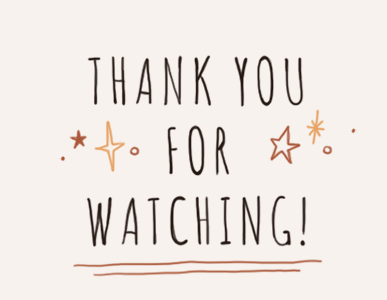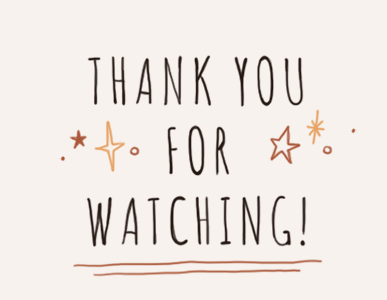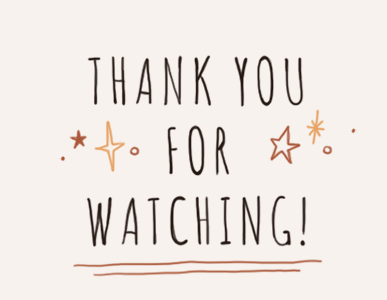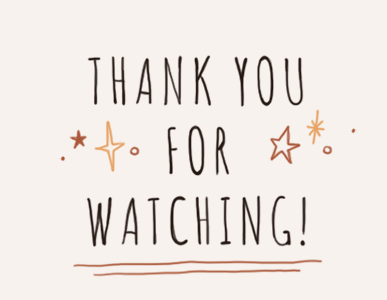